# Image Processing OpenCV
## Blending and Pasting Images (Same Size)

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt

Shape Img1 : (512, 640, 3)
Shape Img2 : (403, 403, 3)
Resized Blended Image : (403, 403, 3)


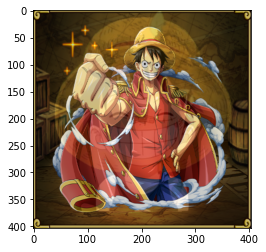

In [26]:
img1 = cv.imread('./ImgResources/profile.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
print('Shape Img1 :', img1.shape)
img1 = cv.resize(img1, (403,403)) # making same size 

img2 = cv.imread('./ImgResources/profile_kid.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
print('Shape Img2 :', img2.shape)
img2 = cv.resize(img2, (403,403))

# Blending
blended = cv.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)
print('Resized Blended Image :', blended.shape)
plt.imshow(blended)

## Overlay Images

Shape Img1 : (600, 600, 3)
Shape Img2 : (1024, 1280, 3)


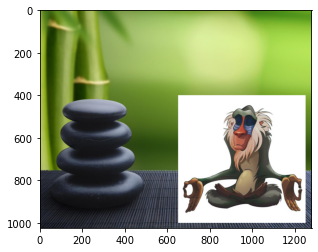

In [52]:
img1 = cv.imread('./ImgResources/monkey.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
print('Shape Img1 :', img1.shape)

img2 = cv.imread('./ImgResources/zen.jpeg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
print('Shape Img2 :', img2.shape)

large_img, small_img = img2, img1

x_offset = 650
y_offset = 400

x_end = x_offset + small_img.shape[1] 
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(large_img)

## Blending and Pasting Images (Different Size)

Shape Img1 : (500, 500, 3)
Shape Img2 : (800, 800, 3)


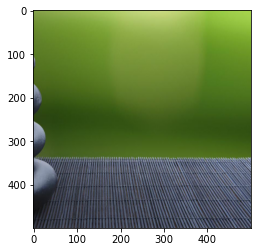

In [87]:
img1 = cv.imread('./ImgResources/zen_circle.jpeg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img1 = cv.resize(img1, (500,500))
print('Shape Img1 :', img1.shape)

img2 = cv.imread('./ImgResources/zen.jpeg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img2 = cv.resize(img2, (800,800))
print('Shape Img2 :', img2.shape)

x_offset = 250
y_offset = 250

rows, columns, channels = img2.shape
roi = img2[y_offset:750, x_offset:750]

plt.imshow(roi)

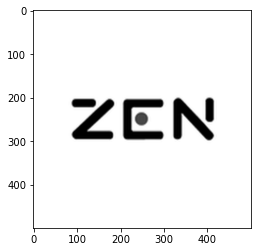

In [88]:
img2gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')

Shape: (500, 500)


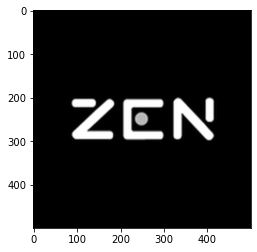

In [89]:
mask_inv = cv.bitwise_not(img2gray)
print('Shape:', mask_inv.shape)
plt.imshow(mask_inv, cmap='gray')

(500, 500, 3)


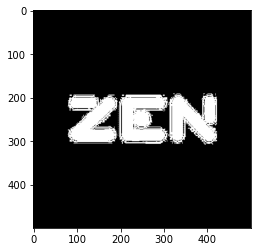

In [90]:
import numpy as np

white_bg = np.full(img1.shape, 255, dtype=np.uint8)
bg = cv.bitwise_or(white_bg, white_bg, mask=mask_inv)
print(bg.shape)
plt.imshow(bg)

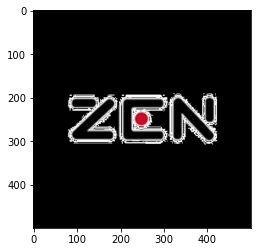

In [91]:
fg = cv.bitwise_or(img1, img1, mask=mask_inv)
plt.imshow(fg)

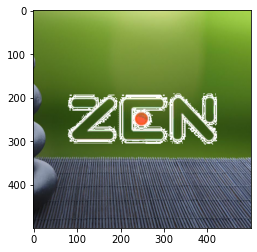

In [92]:
final_roi = cv.bitwise_or(roi,fg)
plt.imshow(final_roi)

large_img, small_img = img2, final_roi

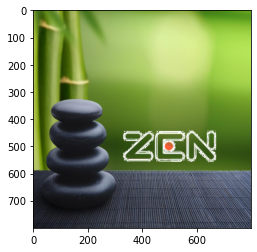

In [93]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)

***